### Домашнее задание "Теория вероятности. Дискретные Случайные Величины".
#### Уровень 0:

Задание 1:
Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов.

Задание 2:
Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

##### Просто́е число́
— натуральное (целое положительное) число, имеющее ровно два различных натуральных делителя — единицу и самого себя

##### Формула Бернулли 
— формула в теории вероятностей, позволяющая находить вероятность появления события A определённое количество раз при любом числе независимых испытаний.

Если вероятность p наступления некоторого события в каждом испытании постоянна, то вероятность$P_{n}^{k}$ того, что данное событие наступит ровно k раз в n независимых испытаниях, равна $P_{n}^{k}$  =  $C_{n}^{k}p^{k}q^{n-k}$  =   $C_{n}^{k}p^{k}q^{n-k}$, где q=1-p.


Оказывается можно точно подсчитать число «удачных» комбинаций исходов испытаний, для которых событие A наступает k раз в n независимых испытаниях, — в точности это количество сочетаний из n по k:
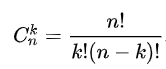

In [160]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn

In [22]:
n = 15   # количество независимых испытаний
l = [1, 3, 5, 7, 9, 11, 13]  # простые числа из n
p = 1/2  # вероятность выпадения орла в каждом испытании
for k in l:  
    C = (math.factorial(n))/(math.factorial(k) * math.factorial(n-k))
    P = C * (p**k) * (1-p)**(n-k)
    print(f'Вероятность выпадения простого числа - {k} орлов составляет {round(P, 4)} ')


Вероятность выпадения простого числа - 1 орлов составляет 0.0005 
Вероятность выпадения простого числа - 3 орлов составляет 0.0139 
Вероятность выпадения простого числа - 5 орлов составляет 0.0916 
Вероятность выпадения простого числа - 7 орлов составляет 0.1964 
Вероятность выпадения простого числа - 9 орлов составляет 0.1527 
Вероятность выпадения простого числа - 11 орлов составляет 0.0417 
Вероятность выпадения простого числа - 13 орлов составляет 0.0032 


In [27]:
# или такой способ
N = 15   # число испытаний
n = 2**15   # число возможных исходов
l = [1, 3, 5, 7, 9, 11, 13]  # простые числа из N
for k in l:
    m = (math.factorial(N))/(math.factorial(k) * math.factorial(N-k))  # число "удачных" комбинаций
    P = m/n   # вероятность
    print(P)

0.000457763671875
0.013885498046875
0.091644287109375
0.196380615234375
0.152740478515625
0.041656494140625
0.003204345703125


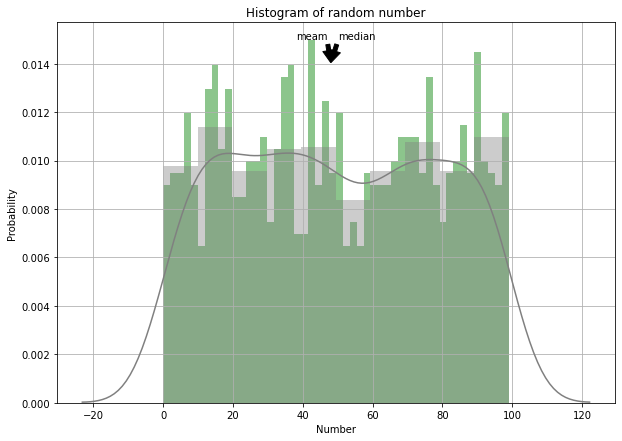

<Figure size 432x288 with 0 Axes>

In [170]:
A = np.random.randint(100, size=13)   # случайная величина
for i in range(1000):
    A = np.append(A, np.random.randint(100))
# или: B = np.random.randint(100, size=1000)
#      C = p.concatenate([A,B])
# или: C = np.vstack((A,B))
# или: C = np.append(A,B)

mean = np.mean(A)  # среднее арифметическое элементов массива
var = np.var(A)    # дисперсия (разброс)
median = np.median(A) # медиана

plt.figure(figsize=(10,7))
plt.hist(A, 50, density=1, facecolor='g', alpha=0.45)  # True = 1, False = 0  в "density"
plt.xlabel('Number')
plt.ylabel('Probability')
plt.title('Histogram of random number')
plt.grid(True)
plt.annotate('meam', xy=(48.03, 0.014), xytext=(38, 0.015),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.annotate('median', xy=(48.0, 0.014), xytext=(50, 0.015),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
#plt.text(0, .014, r'$\mean=100,\ \sigma=15$') себе для информации (не касаемо задания)
seaborn.distplot(A, kde=True, color='grey')   # плотность распределения
plt.show()
mean, var, median
plt.savefig(r'C:\Users\Urmas\Desktop\figure.png')   # сохранить график

#### Уровень 1:

* Задание 3:

Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

* Задание 4 (формула полной вероятности):

В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

P(A1)=P(A2)=P(A3)= 4/8 = 1/2

$n = 2^k$ = 8, где k = 3 броска (бросок трех монет)

m = 4 (число комбинаций с двумя одинаковыми сторонами: ООО, ООР, ОРО, ОРР, РОО, РОР, РРО, РРР)

Появление события A не меняет вероятности появления события B:
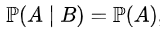

События попарно независимы, если любые два события из этого семейства независимы, то есть:
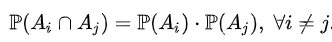

События совместно независимы, если для любого конечного набора этих событий верно:
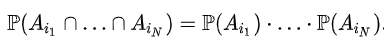

Совместная независимость, очевидно, влечет попарную независимость. Обратное, вообще говоря, неверно.

#### Задание 3
Любые два события из этого набора независимы:
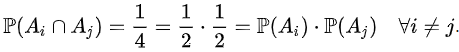

Все три события в совокупности зависимы, ибо зная, например, что события A1 и A2 произошли, мы знаем точно, что  A3 также произошло:
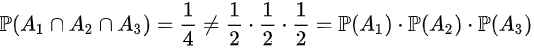

#### Задание 4

Формула полной вероятности:
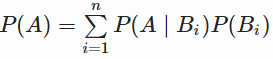

$$P(A1) = 20/100 = 0.2   ---   P(B|A1) = 10/100 = 0.1$$
$$P(A2) = 30/100 = 0.3   ---   P(B|A2) = 5/100 = 0.05$$
$$P(A3) = 50/100 = 0.5   ---   P(B|A3) = 20/100 = 0.2$$

$$P(B) = 0.2*0.1 + 0.3*0.05 + 0.5*0.2 = 0.135$$